<a href="https://colab.research.google.com/github/Mikeygoldman1/Group12_MBTI/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import os
import string
import nltk
from random import sample
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import warnings
from collections import Counter

!pip install plotly>=4.0.0 --quiet
import plotly.express as graph

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

In [ ]:
#Description about data
print("Dataset Description: \n", dataset.describe())
print("\n")
#Info about data
print("Datset Info: \n", dataset.info())
print("\n")

#Shape data
print("Dimensions of Dataset: ",dataset.shape)
print("\n\n")

Dataset Description: 
         type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
Datset Info: 
 None


Dimensions of Dataset:  (8675, 2)







No of posts for each mbti Personality: 

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


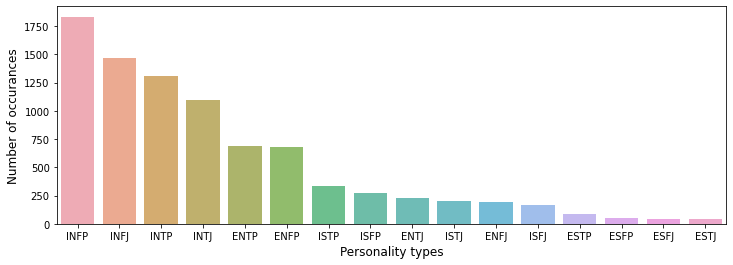

In [ ]:
#Plotting frequency of different categories
countCategory=dataset.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)

#Frequency vs label graphs
#Bar Graph
cnt_srs = dataset['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('Number of occurances', fontsize=12)
plt.show()

In [ ]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

100%|██████████| 8675/8675 [00:03<00:00, 2736.10it/s]


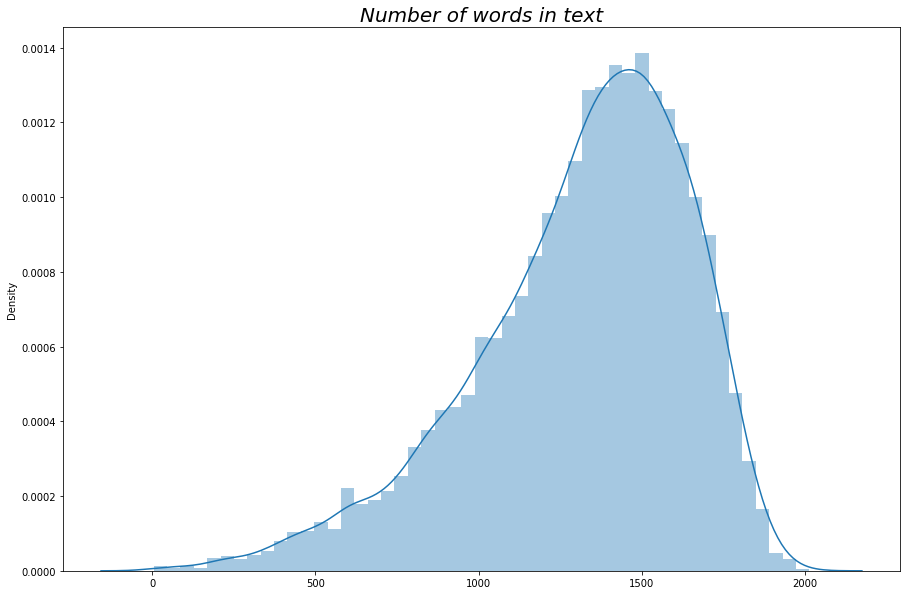

In [ ]:
dataset.posts, train_length = clear_text(dataset)
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [ ]:
dataset['IE']=dataset['type'].apply(lambda x: 1 if x[0]=='I' else 0)
dataset['NS']=dataset['type'].apply(lambda x: 1 if x[1]=='N' else 0)
dataset['TF']=dataset['type'].apply(lambda x: 1 if x[2]=='T' else 0)
dataset['JP']=dataset['type'].apply(lambda x: 1 if x[3]=='J' else 0)
# dataset.drop(['type'],axis=1,inplace=True)

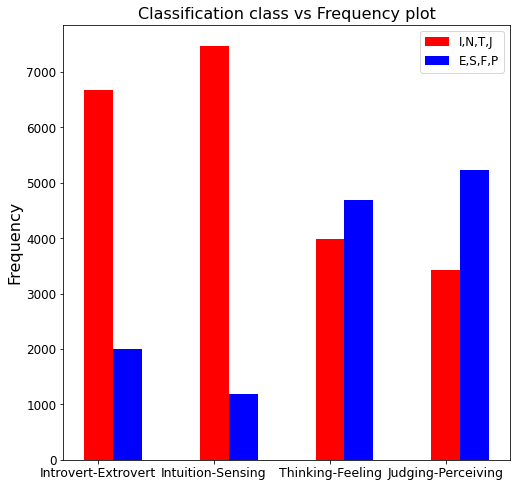

In [ ]:
# Plotting Classification class vs Frequency plot for IE, NS, TF, JP
I,N,T,J=dataset['IE'].value_counts()[1],dataset['NS'].value_counts()[1],dataset['TF'].value_counts()[1],dataset['JP'].value_counts()[1]
E,S,F,P=dataset['IE'].value_counts()[0],dataset['NS'].value_counts()[0],dataset['TF'].value_counts()[0],dataset['JP'].value_counts()[0]

plt.figure(figsize=(8,8))

coordinates=np.array(range(0,4))*2
plt.bar(coordinates-0.25,(I,N,T,J),0.5,label="I,N,T,J",color='red',tick_label=['Introvert-Extrovert','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.25,(E,S,F,P),0.5,label="E,S,F,P",color='blue')

plt.legend(fontsize=12)
plt.title('Classification class vs Frequency plot',size=16)
plt.ylabel('Frequency',size=16)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12)
plt.savefig('imbalance.pdf')

Correlation Matrix:
           IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

HeatMap Visual:

AxesSubplot(0.125,0.125;0.62x0.755)


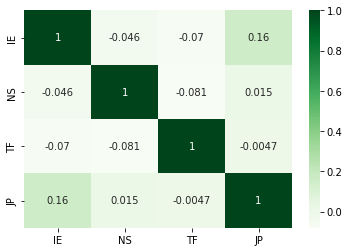

In [ ]:
columns=['IE','NS','TF','JP']
matrix=dataset[columns].corr()

print('Correlation Matrix:\n',matrix)
print('\nHeatMap Visual:\n')
print(sns.heatmap(matrix,annot=True,cmap='Greens'))

## Preprocessing

In [ ]:
import re
import nltk
!pip install contractions --quiet
import contractions
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
def preprocess_1(text):
    
    # Lowering letters
    text = text.lower()
    
    # Removing urls (S+ matches all non whitespace chars)
    text = re.sub(r'http\S*', '', text)

    # Removing emails & twitter usernames
    text = re.sub('\S*@\S*', '', text)

    # Expand contractions   
    text=contractions.fix(text)
        
        
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)

    # Remove MBTI type mentions from posts 
    text = re.sub(r"(intj)|(intp)|(infp)|(infj)|(istj)|(istp)|(isfp)|(isfj)|(entj)|(entp)|(enfp)|(enfj)|(estj)|(estp)|(esfp)|(esfj')", ' ', text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def preprocess_2(text):
    # Removing all whitespaces in order to join with proper whitespace
    word_tokens = word_tokenize(text)
     

    # Removing all stop words
    english_stopwords = stopwords.words('english')  
    word_tokens = [word for word in word_tokens if not word in english_stopwords] 
    
    
    # Lemmatize the text 
    lemmatizer = WordNetLemmatizer()
    word_tokens = [lemmatizer.lemmatize(word) for word in word_tokens ]

    return ' '.join(word_tokens)

In [ ]:
dataset['posts'] = dataset['posts'].apply(preprocess_1)
dataset['posts'] = dataset['posts'].apply(preprocess_2)

## Word clouds

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_imp_words(corpus,full_corpus,n=10):
    
    vec = TfidfVectorizer().fit(full_corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

imp_words_dict = {}
for personality in tqdm(dataset['type'].unique()):
    personality_data = dataset[dataset['type'] == personality]
    imp_words = get_top_n_imp_words(personality_data['posts'],dataset['posts'])
    imp_words_dict[personality] = imp_words

100%|██████████| 16/16 [00:44<00:00,  2.80s/it]


In [ ]:
!pip install wordcloud --quiet
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def show_type_properties(types):
  extracted_data=dataset[dataset['type']==types]
  texts=" ".join(extracted_data['posts'].tolist())
  worldcount=WordCloud(background_color="white", max_words=200,
                   contour_width=3)
  worldcount.generate(texts)
  #Plot
  plt.figure(figsize=[20,6])
  plt.subplot(121)
  plt.imshow(worldcount, interpolation='bilinear')
  plt.axis("off")
  plt.subplot(122)
  tuples = imp_words_dict[types]
  words = [x[0] for x in tuples]
  imp = [x[1] for x in tuples]
  sns.barplot(y = words,x = imp)
  plt.title(f'Important Words for {types}')
  plt.xlabel('Importance - tfidf value')

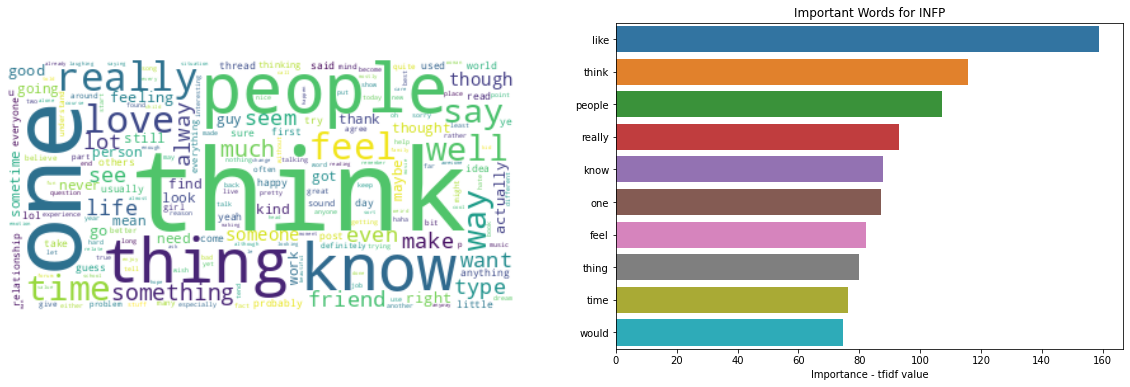

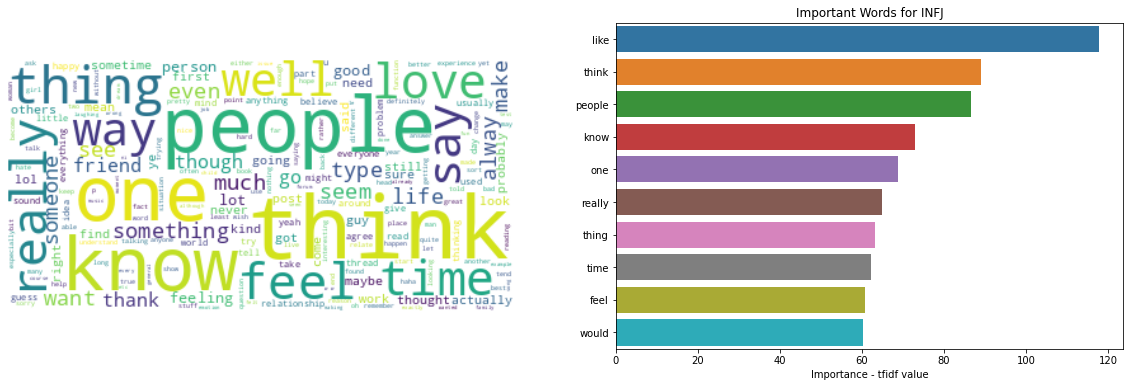

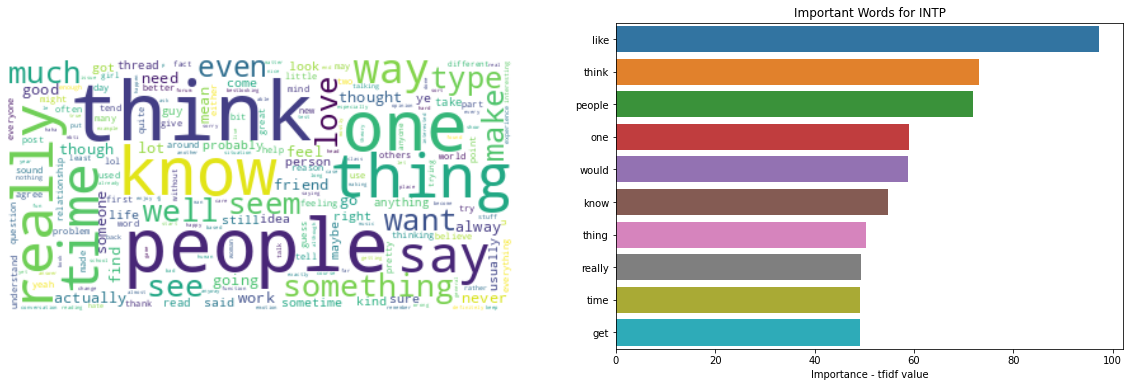

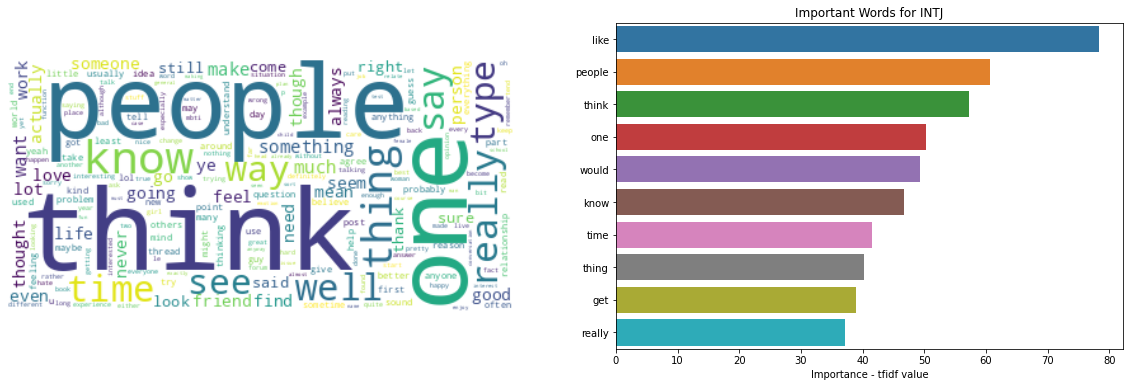

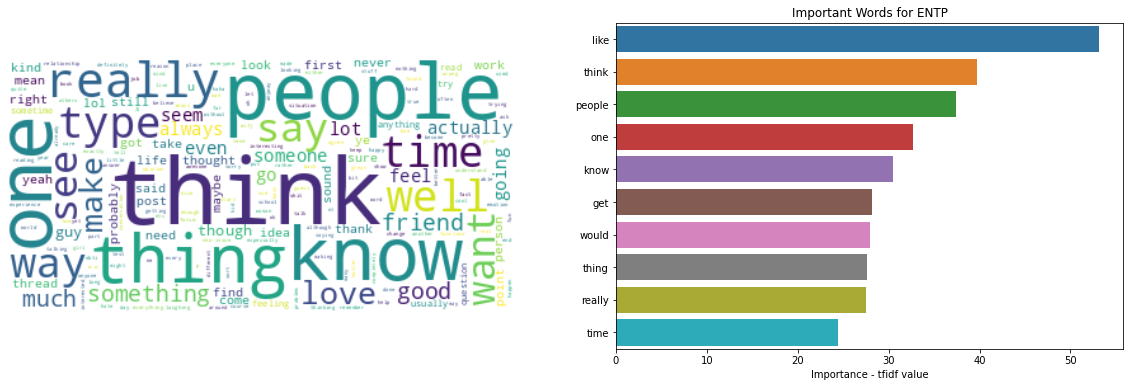

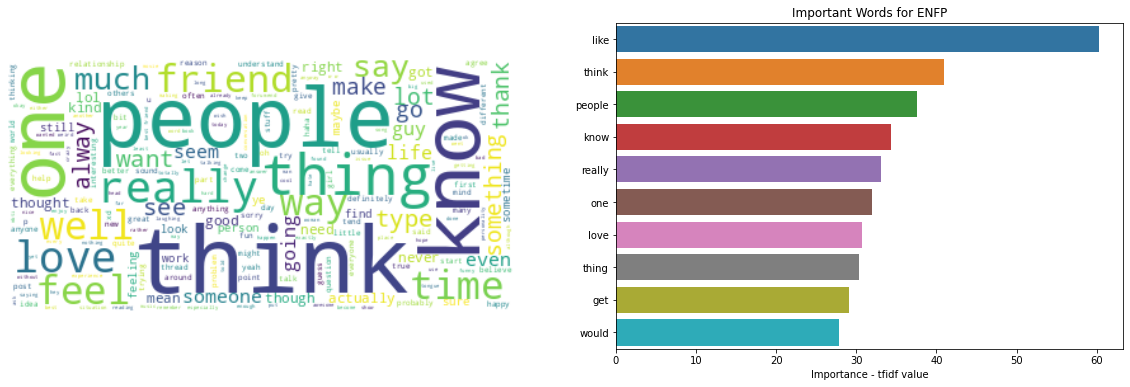

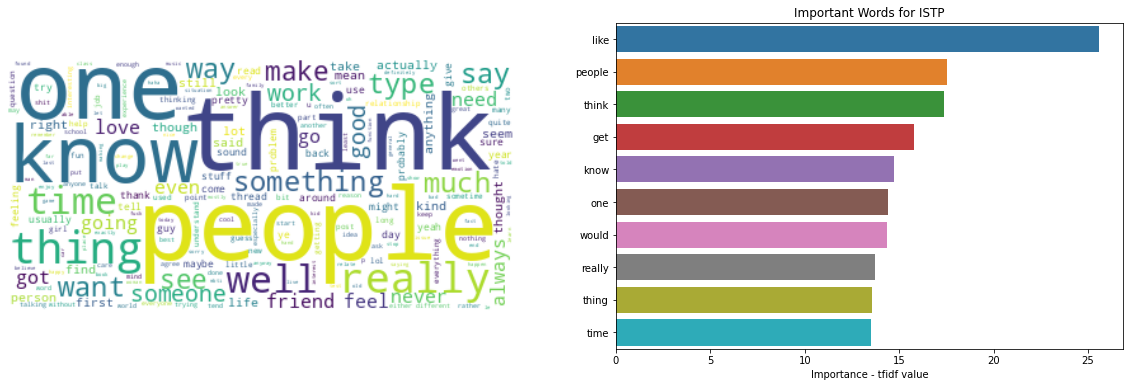

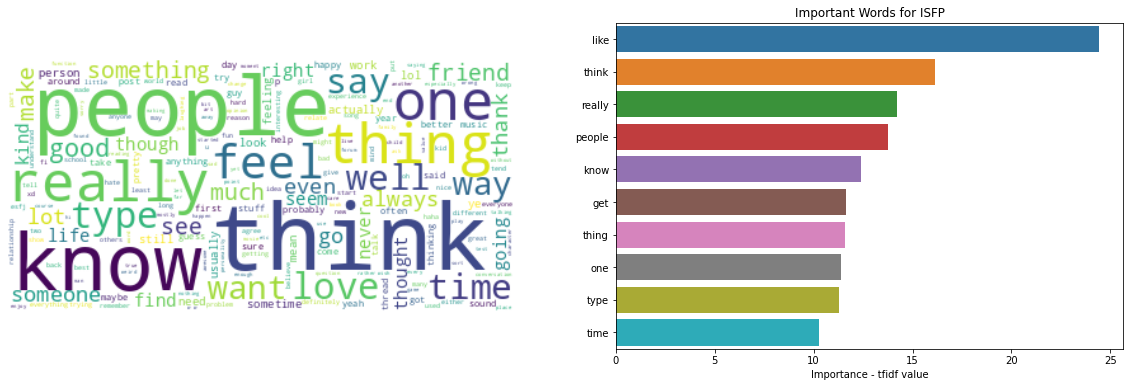

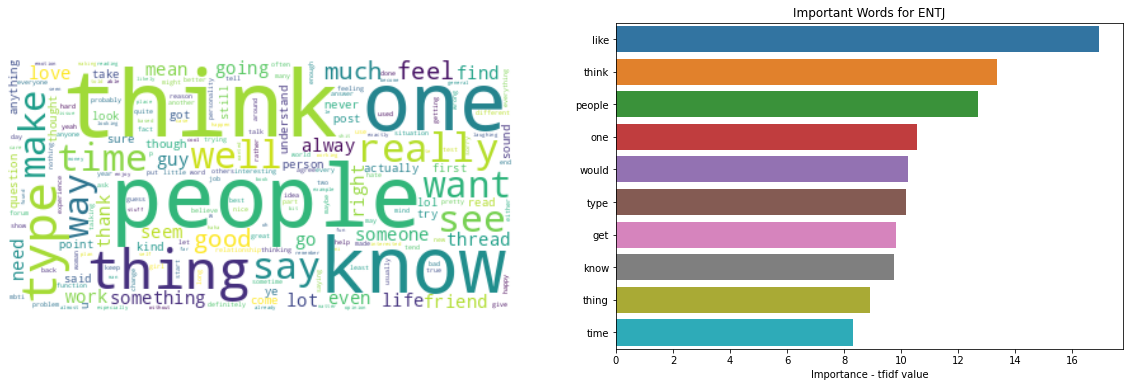

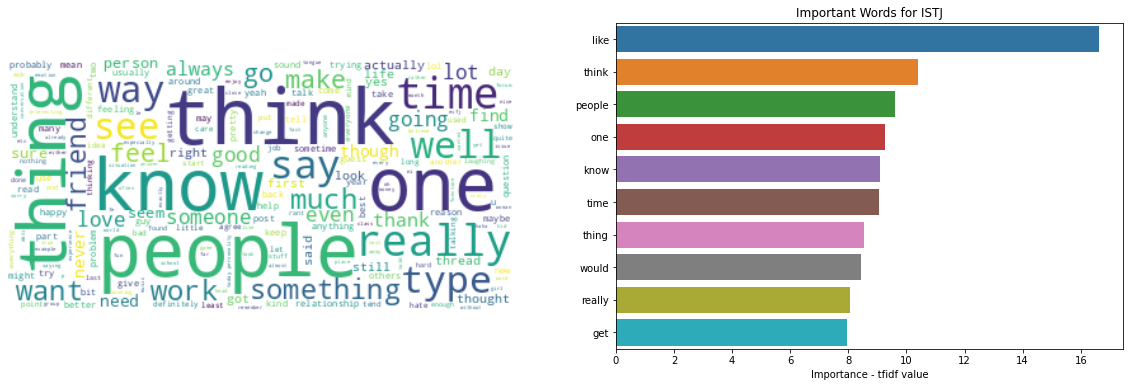

In [ ]:
for i in countCategory.index:
  show_type_properties(i)